In [78]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [3]:
# Loading the files
movies_df = pd.read_csv('movie_data/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Loading the files
ratings_df = pd.read_csv('movie_data/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Loading the files
links_df = pd.read_csv('movie_data/links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
# Loading the files
tags_df = pd.read_csv('movie_data/tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


**What is the shape of "movies.csv"?**

In [7]:
movies_df.shape

(9742, 3)

**What is the shape of "ratings.csv"?**

In [8]:
ratings_df.shape

(100836, 4)

**How many unique "userId" are available in "ratings.csv"?**

In [10]:
unique_user_ids = ratings_df['userId'].nunique()

print(f'The number of unique userIds in ratings.csv is: {unique_user_ids}')

The number of unique userIds in ratings.csv is: 610


**Which movie has recieved maximum number of user ratings?**

In [45]:
merged_data = pd.merge(ratings_df, movies_df, on = 'movieId')
merged_data.groupby('title')['rating'].count().sort_values(ascending=False).reset_index()

,title,rating
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
9714,King Solomon's Mines (1950),1
9715,King Solomon's Mines (1937),1
9716,King Ralph (1991),1
9717,King Kong Lives (1986),1


**Select all the correct tags submitted by users to "Matrix, The (1999)" movie?**

In [36]:
matrix_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

matrix_tags = tags_df[tags_df['movieId'] == matrix_id]

matrix_tags['tag'].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

**What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?**

In [42]:
terminator_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]
print('terminator_mean: ', terminator_ratings['rating'].mean())

terminator_mean:  3.970982142857143


**How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?**

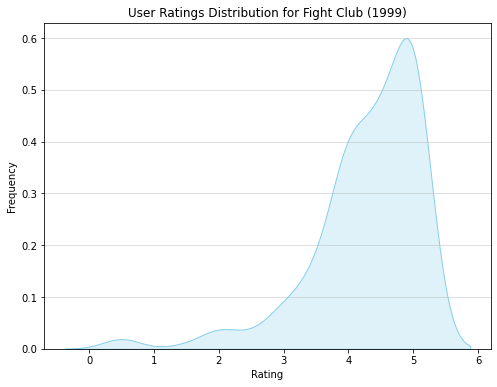

In [54]:
merged_data = pd.merge(ratings_df, movies_df, on = 'movieId')
fight_club_data = merged_data[merged_data['title'] == "Fight Club (1999)"]

plt.figure(figsize=(8, 6))
sns.kdeplot(fight_club_data['rating'], shade=True, color='skyblue')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

## movies_greater_than_50_ratings

In [60]:
ratings_grouped = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
# Renaming columns
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

merged_data = pd.merge(movies_df, ratings_grouped, on='movieId', how='inner')

movies_greater_than_50_ratings = merged_data[merged_data['rating_count'] > 50]

movies_greater_than_50_ratings

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


**Which movie is the most popular based on  average user ratings?**

In [65]:
movies_greater_than_50_ratings.sort_values(by = 'rating_mean', ascending= False).iloc[0]

movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 277, dtype: object

**Select all the correct options which comes under top 5 popular movies based on number of user ratings.**

In [68]:
movies_greater_than_50_ratings.sort_values(by= 'rating_count', ascending= False).head(5).reset_index()

,index,movieId,title,genres,rating_count,rating_mean
0,314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
1,277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
2,257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
3,510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
4,1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


**Which Sci-Fi movie is "third most popular" based on the number of user ratings?**

In [76]:
movies_greater_than_50_ratings[movies_greater_than_50_ratings['genres'].\
                               apply(lambda x: 'Sci-Fi' in x.split('|'))].sort_values(by='rating_count',ascending=False).iloc[2]

movieId                                      480
title                       Jurassic Park (1993)
genres          Action|Adventure|Sci-Fi|Thriller
rating_count                                 238
rating_mean                                 3.75
Name: 418, dtype: object

## Scraping the IBMD movies

In [89]:
movies_with_imdb_ids = pd.merge(movies_greater_than_50_ratings, links_df, on='movieId', how='inner')

all_reviews = []

# Function to scrape IMDB reviews for a movie given its IMDB ID
def scrapper(imdb_id):
    id_str = str(int(imdb_id))
    n_zeroes = 7 - len(id_str)
    new_id = "0" * n_zeroes + id_str
    URL = f"https://www.imdb.com/title/tt{new_id}/reviews"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all review containers
    review_containers = soup.find_all('div', class_='text show-more__control')  # Update this class to the actual review container class
    
    reviews = [container.text.strip() for container in review_containers]
    return reviews

# Iterate through movies with IMDB IDs and scrape reviews
reviews_data = []
for index, row in movies_with_imdb_ids.iterrows():
    imdb_id = row['imdbId']
    movie_reviews = scrapper(imdb_id)
    reviews_data.extend([(imdb_id, review) for review in movie_reviews])

# Create a DataFrame from the collected reviews
reviews_df = pd.DataFrame(reviews_data, columns=['imdbId', 'Review_Text'])


In [90]:
reviews_df

,imdbId,Review_Text
0,114709,Andy's toys live a reasonable life of fun and ...
1,114709,This is a very clever animated story that was ...
2,114709,I am a big fan of the animated movies coming f...
3,114709,Toy Story – 5/5 starsChildren play with toys. ...
4,114709,Toy Story is a sheer delight to view on the sc...
...,...,...
10859,1431045,"First off, I do not read comics so I do not kn..."
10860,1431045,What mythology and stories about Gods were for...
10861,1431045,"With a brilliant script, visceral action, and ..."
10862,1431045,Maybe it's the fact that I never read any of t...


In [91]:
# Saving to csv file
reviews_df.to_csv('reviews_df.csv', index = False)

In [93]:
# Loading the file
reviews_df = pd.read_csv('movie_data/reviews_df.csv')
reviews_df.head()

,imdbId,Review_Text
0,114709,Andy's toys live a reasonable life of fun and ...
1,114709,This is a very clever animated story that was ...
2,114709,I am a big fan of the animated movies coming f...
3,114709,Toy Story – 5/5 starsChildren play with toys. ...
4,114709,Toy Story is a sheer delight to view on the sc...


**Mention the movieId of the movie which has the highest IMDB rating?.**

In [110]:
merged_reviews_links = pd.merge(reviews_df, links_df, on='imdbId', how='inner')

merged_reviews_links_ratings = pd.merge(merged_reviews_links,movies_greater_than_50_ratings, on = 'movieId', how = 'inner')


merged_reviews_links_ratings.sort_values(by='rating_count', ascending=False)['movieId'].unique()[0]

356

**Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating?.**

In [133]:
# Filter the DataFrame to include only Sci-Fi movies
sci_fi_movies = merged_reviews_links_ratings[merged_reviews_links_ratings['genres'].apply(lambda x: 'Sci-Fi' in x.split('|'))]
sci_fi_movies.sort_values(by = 'rating_count', ascending= False)['movieId'].iloc[0]

2571